In [1]:
import os

if os.getcwd().endswith("notebooks"):
    os.chdir("..")
    print("using project root as working dir")

using project root as working dir


In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [20]:
import torch

device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
print(f"using {device} device")

using cuda device


training model...:   0%|          | 0/400 [00:00<?, ?it/s]

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

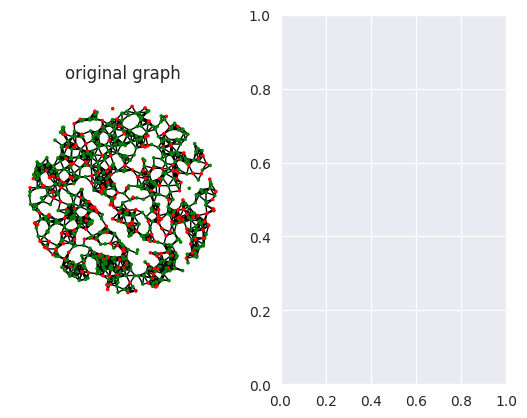

In [23]:
from torch import nn
from datetime import datetime
from src.evaluator import Evaluator
from src.args import Args

experiment = dict(
    key=datetime.now().strftime("%d-%m--%H-%M"),
    reps=3,
    args=[
        Args()
    ]
)

for args in experiment["args"]:
    for rep in range(experiment["reps"]):
        evaluator = Evaluator(
            args=args,
            writer_log_dir=f"new_runs/{experiment['key']}/{args.subsample_size}--{rep}",
            device=device
        )
        evaluator.train(
            loss_fn=nn.BCEWithLogitsLoss(),
            optimizer=torch.optim.Adam(evaluator.net.parameters(), lr=1e-3)
        )
        evaluator.test()
        evaluator.eval()
